In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pystan
import arviz
from scipy.stats import norm
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1)

平均10、標準偏差0.1のデータ20個

In [105]:
average = 10
sigma = 0.1
data_num = 20
data = np.ones(data_num)*average + np.random.randn(data_num)*sigma

In [41]:
data

array([10.14621079,  9.79398593,  9.96775828,  9.96159456, 10.11337694,
        9.89001087,  9.98275718,  9.91221416, 10.00422137, 10.05828152])

(array([0., 0., 0., 0., 0., 1., 0., 1., 1., 3., 1., 1., 2., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([ 9.5 ,  9.55,  9.6 ,  9.65,  9.7 ,  9.75,  9.8 ,  9.85,  9.9 ,
         9.95, 10.  , 10.05, 10.1 , 10.15, 10.2 , 10.25, 10.3 , 10.35,
        10.4 , 10.45, 10.5 ]),
 <a list of 20 Patch objects>)

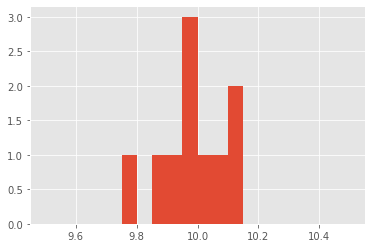

In [42]:
plt.hist(data, bins=20, range=(9.5,10.5))

このデータについて、平均は10として標準偏差をベイズ推定する

In [43]:
## pystanのモデル
stan_model = """
data {
  int N;
  real Y[N];
}

parameters {
  real<lower=0> sigma;
}

model {
  for (n in 1:N){
  Y[n] ~ normal(10, sigma);
  }
}
"""

In [44]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c31d538a0cfaeb031647a7bdeb16c047 NOW.


In [45]:
stan_data = {'N':data.shape[0], 'Y':data}

In [46]:
fit = sm.sampling(data=stan_data, iter=2000, warmup=500, chains=3, seed=1)

In [47]:
fit

Inference for Stan model: anon_model_c31d538a0cfaeb031647a7bdeb16c047.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma   0.12  9.3e-4   0.03   0.07   0.09   0.11   0.13   0.19   1198    1.0
lp__   15.11    0.02   0.73  13.13  14.92  15.39  15.57  15.63   1231    1.0

Samples were drawn using NUTS at Sun Jun 21 11:36:18 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bc8b75510>,
      dtype=object)

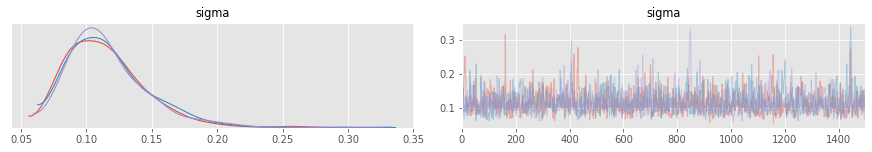

In [48]:
arviz.plot_trace(fit)

(array([0., 0., 0., 0., 0., 0., 2., 2., 5., 4., 2., 4., 0., 1., 0., 0., 0.,
        0., 0., 0.]),
 array([ 9.5 ,  9.55,  9.6 ,  9.65,  9.7 ,  9.75,  9.8 ,  9.85,  9.9 ,
         9.95, 10.  , 10.05, 10.1 , 10.15, 10.2 , 10.25, 10.3 , 10.35,
        10.4 , 10.45, 10.5 ]),
 <a list of 20 Patch objects>)

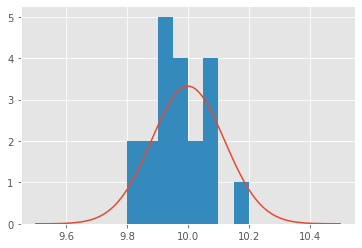

In [106]:
#weight = np.ones(len(data))/float(len(data))
x = np.linspace(9.5, 10.5, num=100)
y = norm.pdf(x, 10, 0.12)
plt.plot(x, y)
plt.hist(data, bins=20, range=(9.5,10.5), density=True)

In [59]:
np.ones(len(data))/float(len(data))

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])